# Crime Dataset Prediction:

# Importing Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Reading the Dataset

In [135]:
crime = pd.read_csv("crimedata.csv")

In [136]:
print(crime.shape)
crime.head()

(9017, 33)


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING and ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [137]:
# Summarize our dataset 
print ("Rows     : " ,crime.shape[0])
print ("Columns  : " ,crime.shape[1])
print ("\nFeatures : \n" ,crime.columns.tolist())

Rows     :  9017
Columns  :  33

Features : 
 ['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING and ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']


In [138]:
#Checking dtypes
crime.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING and ABDUCTION                                int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

# Checking the categorical Columns

In [139]:
cat_col = []
for x in crime.dtypes.index:
    if crime.dtypes[x] == 'object':
        cat_col.append(x)
print("catagorical columns:",cat_col,end =" ")

catagorical columns: ['STATE/UT', 'DISTRICT'] 

In [141]:
for col in crime.columns:
    if crime[col].dtypes == 'object':
         print(f'{col}: {crime[col].unique()}')

STATE/UT: ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']
DISTRICT: ['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM'
 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE'
 'NIZAMABAD' 'PRAKASHAM' 'RANGA REDDY' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'VIJAYAWADA' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'TOTAL' 'CHANGLANG'
 'DIBANG VALLEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT' 'PAPUM PARE'
 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER'
 'SUBANSIRI UP

# Checking Null Values

In [75]:
print("Are There Missing Data? :",crime.isnull().any().any())

Are There Missing Data? : False


# Exploratory Data Analysis:
Checking the features that are mostly influencing the target Variable.

1.Univariate Analysis

2.Multivariate Analysis

3.Bivariate Analysis

In [76]:
crime.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


         STATE/UT   RAPE
0  MADHYA PRADESH  72174
1     WEST BENGAL  41574
2   UTTAR PRADESH  38116
3     MAHARASHTRA  35972
4           ASSAM  32356


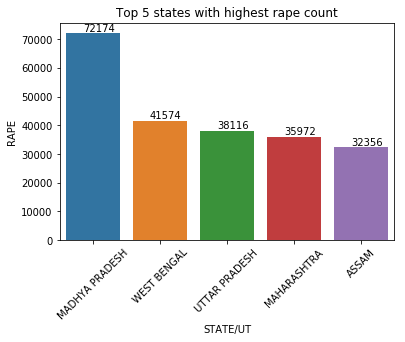

In [77]:
# Top 5 states with highest Rape count:
top_5 = crime.groupby(by ='STATE/UT')['RAPE'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5)
# Visualizing by bar plot
ax = sns.barplot(top_5['STATE/UT'],top_5['RAPE'])
plt.xticks(rotation= 45)
plt.title("Top 5 states with highest rape count")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

   YEAR   RAPE
0  2012  49846
1  2011  48412
2  2010  44344
3  2008  42934
4  2009  42794


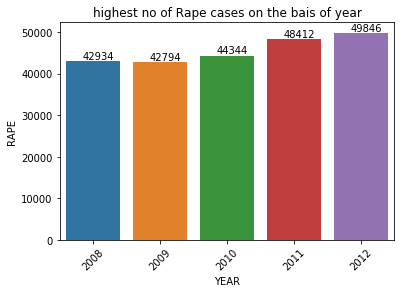

In [78]:
# Determing the highest no of Rape cases on the bais of year.
top_5 = crime.groupby(by ='YEAR')['RAPE'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_5)
# Visualizing by bar plot
ax = sns.barplot(top_5['YEAR'],top_5['RAPE'])
plt.xticks(rotation= 45)
plt.title("highest no of Rape cases on the bais of year")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [79]:
# No of Deaths cases due to Dowry
deaths_due_to_dowry = crime['DOWRY DEATHS'].sum()
print(deaths_due_to_dowry)

182404


In [80]:
# No of Deaths due to negligence 
death_due_to_negligence = crime['CAUSING DEATH BY NEGLIGENCE'].sum()
print(death_due_to_negligence)

2003728


Text(0.5, 1.0, 'no of Rape cases in Maharatra')

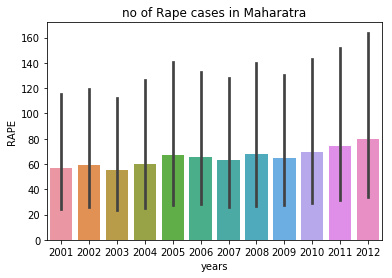

In [81]:
#Checking no of Rape cases in Maharatra.
maharashtra = crime.loc[crime['STATE/UT'] == 'MAHARASHTRA']
maharashtra.groupby(by='YEAR')['RAPE'].sum().sort_values(ascending=False).head(5).reset_index()
# Visualizing the data:
sns.barplot(x='YEAR',y='RAPE',data=maharashtra)
plt.xlabel("years")
plt.ylabel("RAPE")
plt.title('no of Rape cases in Maharatra')

In [82]:
# Attempt to murder cases in different states:
pd.pivot_table(index=['STATE/UT','YEAR'],values=['ATTEMPT TO MURDER'],aggfunc='sum',data=crime,margins_name='STATE/UT').head(30)

ATTEMPT TO MURDER
STATE/UT          YEAR                   
A & N ISLANDS     2001                  0
                  2002                  6
                  2003                  8
                  2004                  2
                  2005                  6
                  2006                  8
                  2007                 38
                  2008                 22
                  2009                  8
                  2010                 14
                  2011                 12
                  2012                  6
ANDHRA PRADESH    2001               3110
                  2002               3288
                  2003               3356
                  2004               3816
                  2005               3448
                  2006               3720
                  2007               3770
                  2008               3884
                  2009               3718
                  2010               3906
                  2011               4458
                  2012               4366
ARUNACHAL PRADESH 2001                106
                  2002                 76
                  2003                 40
                  2004                 90
                  2005                 74
                  2006                 66

Text(0.5, 1.0, 'Assult cases on women')

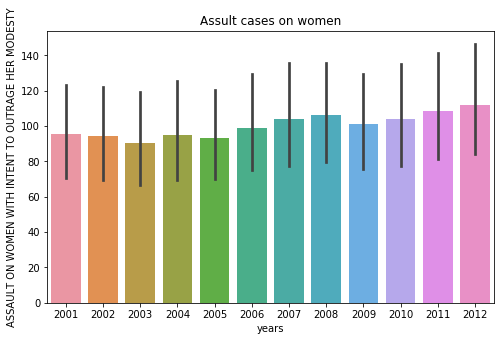

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(x='YEAR',y='ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',data=crime)
plt.xlabel("YEAR")
plt.ylabel('assault on women with intent to outrage her modesty')
plt.xlabel("years")
plt.ylabel("ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY")
plt.title('Assult cases on women')

Text(0.5, 1.0, 'No of DOWRY DEATHS in Bihar')

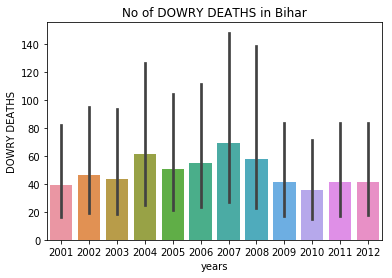

In [84]:
#Checking no of dowry deaths in bihar.
bihar = crime.loc[crime['STATE/UT'] == 'BIHAR']
bihar.groupby(by='YEAR')['DOWRY DEATHS'].sum().sort_values(ascending=False).head(5).reset_index()
# Visualizing the data:
sns.barplot(x='YEAR',y='RAPE',data=bihar)
plt.xlabel("years")
plt.ylabel("DOWRY DEATHS")
plt.title('No of DOWRY DEATHS in Bihar')

In [85]:
# Murder cases of different states District wise:
pd.pivot_table(index=['STATE/UT','DISTRICT'],values=['MURDER'],aggfunc='sum',data=crime,margins_name='STATE/UT').tail(30)

MURDER
STATE/UT    DISTRICT                 
WEST BENGAL 24 PARGANAS SOUTH    2114
            ASANSOL               395
            BANKURA               665
            BDN CP                 15
            BIRBHUM               908
            BKP CP                 89
            BURDWAN              1290
            COOCHBEHAR            485
            DAKSHIN DINAJPUR      369
            DARJEELING            583
            HOOGHLY              1115
            HOWRAH                666
            HOWRAH CITY           201
            HOWRAH G.R.P.         123
            JALPAIGURI           1345
            JHARGRAM               30
            KHARAGPUR G.R.P.       44
            KOLKATA               596
            MALDA                 885
            MIDNAPUR              120
            MURSHIDABAD          1644
            NADIA                1355
            PASCHIM MIDNAPUR     1350
            PURAB MIDNAPUR        707
            PURULIA               733
            SEALDAH G.R.P.        188
            SILIGURI G.R.P.        42
            SILIGURI_PC            32
            TOTAL               21056
            UTTAR DINAJPUR        638

Text(0.5, 1.0, 'District wise Dowry murder in Bihar')

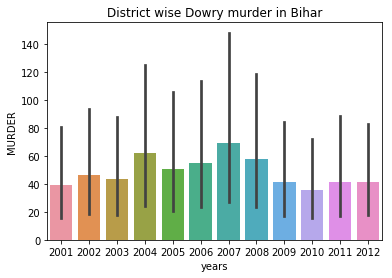

In [94]:
#Checking no of dowry deaths in bihar.
bihar = crime.loc[crime['STATE/UT'] == 'BIHAR']
bihar.groupby(by='DISTRICT')['MURDER'].sum().sort_values(ascending=False).head(5).reset_index()
# Visualizing the data:
sns.barplot(x='YEAR',y='RAPE',data=bihar)
plt.xlabel("years")
plt.ylabel("MURDER")
plt.title('District wise Dowry murder in Bihar')

Text(0.5, 1.0, 'Murder and Rape of Girls')

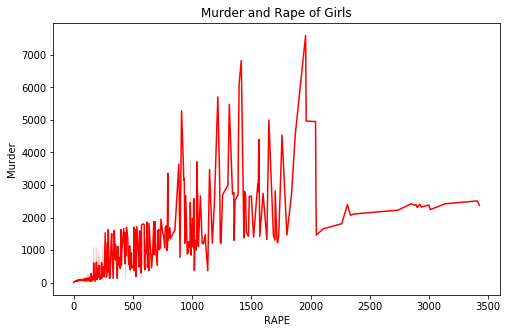

In [102]:
# Bivariate Analysis Checking relationship between rape and murder
plt.figure(figsize=(8,5))
sns.lineplot(x='RAPE',y='MURDER',data=crime,color='red')
plt.xlabel("RAPE")
plt.ylabel("Murder")
plt.title("Murder and Rape of Girls")

Text(0.5, 1.0, 'YEAR WISE MURDER')

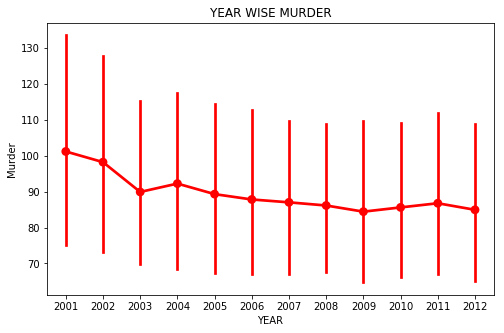

In [103]:
# Bivarite Analysis Checking Year Wise Murder rate:
plt.figure(figsize=(8,5))
sns.pointplot(x='YEAR',y='MURDER',data=crime,color='red')
plt.xlabel("YEAR")
plt.ylabel("Murder")
plt.title("YEAR WISE MURDER")

# Removing Unwanted Columns:

In [104]:
crime.drop(columns=['STATE/UT','DISTRICT','YEAR'],axis=1,inplace=True)

In [105]:
crime.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,101,60,17,50,0,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,151,125,1,23,0,23,53,30,23,8,...,69,1543,7,118,24,154,0,270,754,4125
2,101,57,2,27,0,27,59,34,25,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,80,53,1,20,0,20,25,20,5,1,...,23,795,17,126,38,57,0,233,1181,3140
4,82,67,1,23,0,23,49,26,23,4,...,41,1244,12,109,58,247,0,431,2313,6507


# Checking for Outliers and Neutralizing them

In [106]:
# Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(crime))
print(crime.shape)
crime_final = crime.loc[(zscore<3).all(axis=1)]
print(crime_final.shape)

(9017, 30)
(8669, 30)


In [107]:
crime_final.shape

(8669, 30)

# Selecting X and Y Values

In [108]:
X = crime_final.drop('MURDER',axis=1)
y = crime_final['MURDER']
print(X.shape)
print(y.shape)

(8669, 29)
(8669,)


In [109]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [110]:
print(selection.feature_importances_)

[0.19359052 0.04484192 0.0242549  0.         0.04292562 0.06460763
 0.01646206 0.06903817 0.05999197 0.00650992 0.06571514 0.01441874
 0.01028313 0.00892741 0.01670023 0.02175703 0.02151122 0.00995536
 0.00795605 0.01835931 0.01730355 0.12093231 0.01505825 0.02176235
 0.01322539 0.00286301 0.03466173 0.01500225 0.04138482]


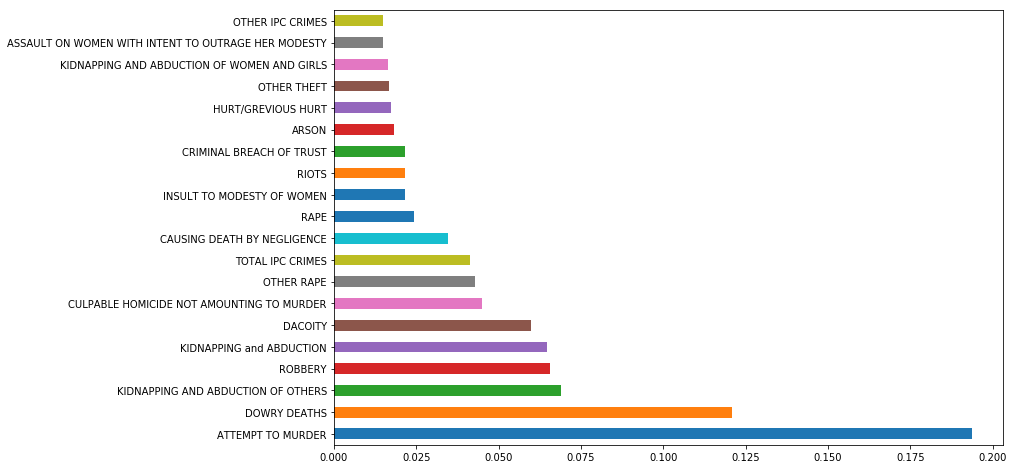

In [111]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Total Murder  X_train dataset: ", X_train.shape)
print("Total Murder  y_train dataset: ", y_train.shape)
print("Total Murder  X_test dataset: ", X_test.shape)
print("Total Murder  y_test dataset: ", y_test.shape)

Total Murder  X_train dataset:  (6935, 29)
Total Murder  y_train dataset:  (6935,)
Total Murder  X_test dataset:  (1734, 29)
Total Murder  y_test dataset:  (1734,)


# Scaling out Model

In [113]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regresion

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
def classify(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [116]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = classify(lr,X,y)

r2_score corresponding to random state:  42 is  0.9999746655598851
r2_score corresponding to random state:  43 is  0.999974329039926
r2_score corresponding to random state:  44 is  0.9999765249144481
r2_score corresponding to random state:  45 is  0.9999999935037915
r2_score corresponding to random state:  46 is  0.9999999905592974
r2_score corresponding to random state:  47 is  0.9999547206954031
r2_score corresponding to random state:  48 is  0.9999510626405079
r2_score corresponding to random state:  49 is  0.9999761882133902
r2_score corresponding to random state:  50 is  0.9999720157794807
r2_score corresponding to random state:  51 is  0.9999999929533787
r2_score corresponding to random state:  52 is  0.9999752544961223
r2_score corresponding to random state:  53 is  0.9999999929174117
r2_score corresponding to random state:  54 is  0.9999999931632377
r2_score corresponding to random state:  55 is  0.9999999930308594
r2_score corresponding to random state:  56 is  0.9999740774102

In [117]:
####Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.9999917291059081
standard deviation in r2_score for linear Regression: 1.65226667909245e-05


In [118]:
# Fitting the model with best random state:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_scr = r2_score(y_test,y_pred)
print(r2_scr)

0.9999999940200907


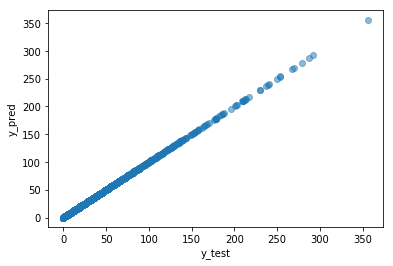

In [119]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Lasso Regression

In [120]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [121]:
param = {'alpha':[0.001,0.01,0.1,1]}

In [122]:
grid = GridSearchCV(estimator=lasso,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]})

In [123]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1}
0.7915988644772158


In [124]:
lasso = Lasso(alpha=1)
r_state = classify(lasso,X,y)

r2_score corresponding to random state:  42 is  0.8157723248409922
r2_score corresponding to random state:  43 is  0.798324380332221
r2_score corresponding to random state:  44 is  0.7997682899536558
r2_score corresponding to random state:  45 is  0.7941217730842149
r2_score corresponding to random state:  46 is  0.8002276754921749
r2_score corresponding to random state:  47 is  0.7964095143347176
r2_score corresponding to random state:  48 is  0.8042640491400108
r2_score corresponding to random state:  49 is  0.7996765691473665
r2_score corresponding to random state:  50 is  0.7930321040121605
r2_score corresponding to random state:  51 is  0.7916358036464836
r2_score corresponding to random state:  52 is  0.8033243589067466
r2_score corresponding to random state:  53 is  0.8015977776713339
r2_score corresponding to random state:  54 is  0.7778887368163995
r2_score corresponding to random state:  55 is  0.8012216351310285
r2_score corresponding to random state:  56 is  0.7762251925701

In [125]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.7766406736201211
standard deviation in r2_score for lasso Regression: 0.03328851899714968


# Ridge Regression

In [126]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [127]:
param = {'alpha':[0.001,0.01,0.1,1]}

In [128]:
gk = GridSearchCV(estimator=ridge,param_grid=param,cv=5,return_train_score=False)
gk.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]})

In [129]:
print(gk.best_params_)
print(gk.best_score_)

{'alpha': 0.001}
0.9999860842851284


In [130]:
ridge = Ridge(alpha=0.001)
r_state = classify(ridge,X,y)

r2_score corresponding to random state:  42 is  0.9999746655600495
r2_score corresponding to random state:  43 is  0.9999743290388778
r2_score corresponding to random state:  44 is  0.9999765249145876
r2_score corresponding to random state:  45 is  0.9999999935041376
r2_score corresponding to random state:  46 is  0.9999999905593008
r2_score corresponding to random state:  47 is  0.999954720694549
r2_score corresponding to random state:  48 is  0.9999510626396753
r2_score corresponding to random state:  49 is  0.9999761882136669
r2_score corresponding to random state:  50 is  0.9999720157785336
r2_score corresponding to random state:  51 is  0.9999999929537283
r2_score corresponding to random state:  52 is  0.9999752544963111
r2_score corresponding to random state:  53 is  0.9999999929176189
r2_score corresponding to random state:  54 is  0.9999999931633984
r2_score corresponding to random state:  55 is  0.9999999930310604
r2_score corresponding to random state:  56 is  0.9999740774107

In [131]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.9999917291058953
standard deviation in r2_score Ridge Regression: 1.6522667218050248e-05


# Saving the best model

In [132]:
import joblib
joblib.dump(lr,'lr.obj')
lr_from_joblib = joblib.load('lr.obj')
lr_from_joblib.predict(X_test)

array([76.01131332, 58.00210523, 98.99410795, ..., 78.99892294,
       14.00145585, 74.99944055])